<a href="https://colab.research.google.com/github/aliparsaa/aliparsaa/blob/main/prohpet_%26becktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastquant 
from fastquant import get_crypto_data, backtest
from fbprophet import Prophet
from matplotlib import pyplot as plt


     |████████████████████████████████| 5.3 MB 13.7 MB/s 
     |████████████████████████████████| 1.5 MB 40.1 MB/s 
     |████████████████████████████████| 148 kB 53.9 MB/s 
     |████████████████████████████████| 2.0 MB 41.9 MB/s 
     |████████████████████████████████| 97 kB 7.4 MB/s 
     |████████████████████████████████| 191 kB 47.0 MB/s 
     |████████████████████████████████| 410 kB 66.3 MB/s 
     |████████████████████████████████| 510 kB 76.3 MB/s 
     |████████████████████████████████| 6.3 MB 72.7 MB/s 
     |████████████████████████████████| 138 kB 71.2 MB/s 
     |████████████████████████████████| 743 kB 73.0 MB/s 
     |████████████████████████████████| 745 kB 71.9 MB/s 
     |████████████████████████████████| 294 kB 71.9 MB/s 
     |████████████████████████████████| 1.3 MB 49.1 MB/s 
     |████████████████████████████████| 3.0 MB 40.5 MB/s 
     |████████████████████████████████| 142 kB 47.1 MB/s 
     |████████████████████████████████| 291 kB 70.8 MB/s 
     |██████████

In [7]:
# Pull crypto data
df = get_crypto_data("BTC/USDT", "2019-01-01", "2021-09-11")



In [8]:
# Fit model on closing prices
ts = df.reset_index()[["dt", "close"]]
ts.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
forecast = m.make_future_dataframe(periods=30, freq='D')



Text(0.5, 1.0, 'BTC/USDT: Forecasted Daily Closing Price')

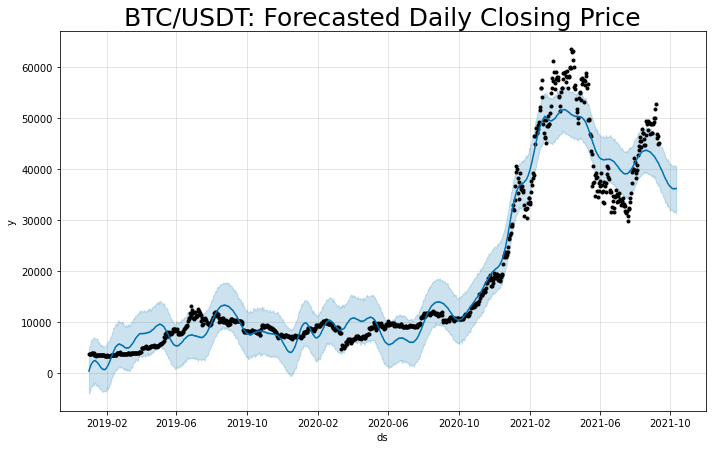

In [9]:
# Predict and plot
pred = m.predict(forecast)
fig1 = m.plot(pred)
plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)

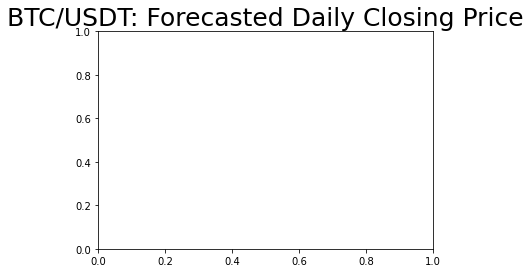

In [10]:
plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)
# Convert predictions to expected 1 day returns
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)





Starting Portfolio Value: 100000.00
2021-09-11T00:00:00, ===Global level arguments===
2021-09-11T00:00:00, init_cash : 100000
2021-09-11T00:00:00, buy_prop : 1
2021-09-11T00:00:00, sell_prop : 1
2021-09-11T00:00:00, commission : 0
2021-09-11T00:00:00, stop_loss : 0
2021-09-11T00:00:00, stop_trail : 0
2021-09-11T00:00:00, take_profit : 0
===Strategy level arguments===
Upper limit:  0.5
Lower limit:  -1.5
2021-09-11T00:00:00, Final Portfolio Value: 2805536.82
2021-09-11T00:00:00, Final PnL: 2705536.82
Time used (seconds): 0.707369327545166
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	upper_limit:0.5	lower_limit:-

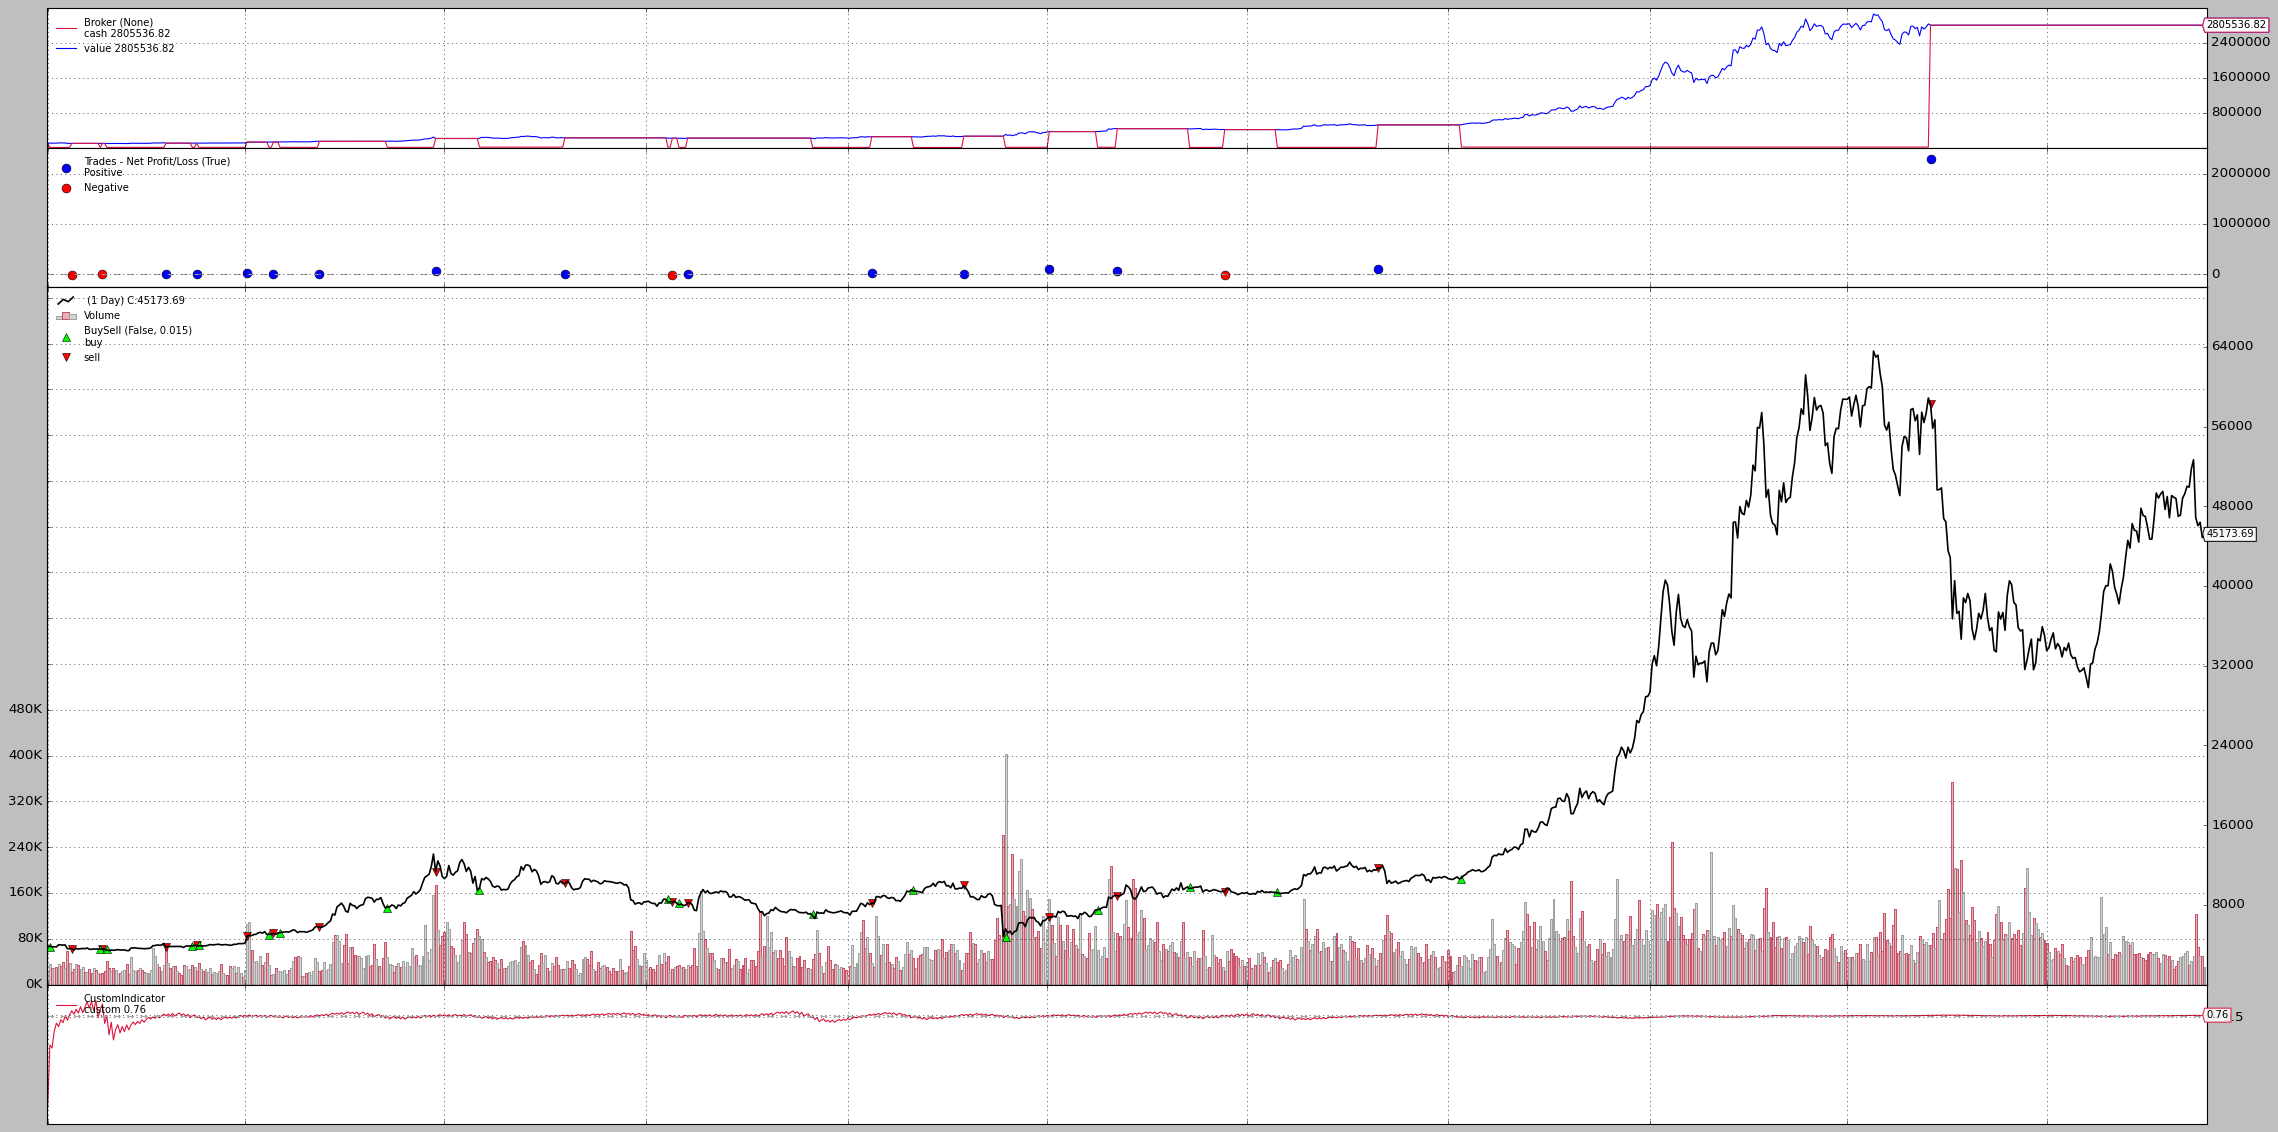

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,upper_limit,lower_limit,custom_column,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,,,False,1.5,0,M,True,0.5,-1.5,custom,3.33418,0.003385,1.346696,134.669624,151,8.363001,256039.68,"{'len': 184, 'drawdown': 25.046570870416595, '...",25.046571,184,1.240308,2705536.82,2805536.82,18,0.777778,14,4,195717.32,195.71732,-8626.415,-8.626415,2286776.64,2286.77664,-21752.28,-21.75228


In [13]:


# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df["custom"] = expected_1day_return.multiply(-1)
backtest("custom", df.dropna(),upper_limit=0.5, lower_limit=-1.5)

